# Milestone 2 - Exploratory Analysis

This notebook regroups the different plots of the exploratory analysis of our dataset. 

In [1]:
import pandas as pd
import requests
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Colonizing countries

We will first observe which countries were the biggest colonisers over the past centuries. The first common observation is that all of them are european countries.

In [2]:
colonies_df = pd.read_csv('datasets/colonies.csv')

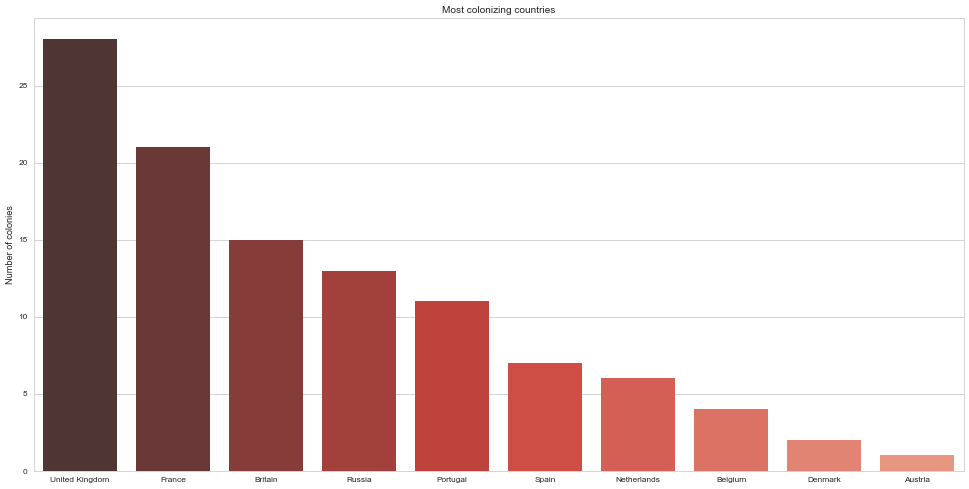

In [3]:
x = np.linspace(0,9,10)
my_xticks = colonies_df['Colonizer Country'].value_counts().index
y = colonies_df['Colonizer Country'].value_counts().values


plt.figure(figsize=(20,10), dpi=60, facecolor='w', edgecolor='k')
sns.set(style="whitegrid")
sns.barplot(x,y,palette="Reds_d")
plt.xticks(x, my_xticks)
plt.ylabel('Number of colonies')
plt.title('Most colonizing countries')
plt.show()

## Decolonisation over time and continent

> Can't continue this part because of lack of dataset cleaning

By looking at the deconolisation dates, we can observe when European Colonisers has lost their grasps on their colonies. (Happening by vague in continents? Communicating between continents? Map of the decolonisation date would be good to look at limitrophs countries)

In [4]:
decolonisation_df = pd.read_csv('datasets/colonies_wikipedia.csv')
decolonisation_df = decolonisation_df[decolonisation_df['Date'] != 'False']
decolonisation_df.head()

,Unnamed: 0,Colonized Country,ID,Date,Colonizer Country,URL
2,3,Canada,CA,1867,United Kingdom,/wiki/Canada
3,4,United States,US,1776,United Kingdom,/wiki/United_States
4,5,Haiti,HT,1804,France,/wiki/Haiti
5,6,Benin,BJ,1960,France,/wiki/Benin
6,7,Algeria,DZ,1962,France,/wiki/Algeria


In [5]:
x = np.linspace(1776,2017,242)
my_xticks = decolonisation_df['Date'].value_counts().index
y = decolonisation_df['Date'].value_counts().values

plt.figure(figsize=(20,10), dpi=60, facecolor='w', edgecolor='k')
sns.barplot(x,y,palette="Reds_d")
plt.xticks(x, my_xticks)
plt.ylabel('Number of colonies')
plt.title('Most colonizing countries')
plt.show()

ValueError: Grouper and axis must be same length

In [6]:
y = decolonisation_df['Date'].value_counts()
y.head(21)

1960            14
1962             5
1975             5
1991             4
1966             3
1821             3
1968             3
1956             3
1948             3
1918             3
1810             3
1961             3
1971             3
1947             3
1965             2
1825             2
1917             2
1898             2
1949             2
1990             2
(1932-10-03)     1
Name: Date, dtype: int64

## Evolution of conflicts

### Presence of conflicts on continents

In this part, all conflicts are taken into account, given that they present more than 25 casualties.
Maybe separating this table also between minor and major conflicts would be relevant.

In [7]:
ucdp_df = pd.read_csv('datasets/ucdp-prio-acd-171.csv')
ucdp_df.head()

,conflictid,location,sidea,sidea2nd,side b,sidebid,sideb2nd,incomp,terr,year,...,epend,ependdate,ependprec,gwnoa,gwnoa2nd,gwnob,gwnob2nd,gwnoloc,region,version
0,200,Bolivia,Government of Bolivia,NaN,Popular Revolutionary Movement,719,NaN,2,NaN,1946,...,1,1946-07-21,1.0,145,NaN,NaN,NaN,145,5,17.1
1,200,Bolivia,Government of Bolivia,NaN,MNR,720,NaN,2,NaN,1952,...,1,1952-04-12,1.0,145,NaN,NaN,NaN,145,5,17.1
2,200,Bolivia,Government of Bolivia,NaN,ELN,721,NaN,2,NaN,1967,...,1,1967-10-16,1.0,145,NaN,NaN,NaN,145,5,17.1
3,201,Cambodia (Kampuchea),Government of France,NaN,Khmer Issarak,160,NaN,1,Cambodia,1946,...,0,NaN,NaN,220,NaN,NaN,NaN,811,3,17.1
4,201,Cambodia (Kampuchea),Government of France,NaN,Khmer Issarak,160,NaN,1,Cambodia,1947,...,0,NaN,NaN,220,NaN,NaN,NaN,811,3,17.1


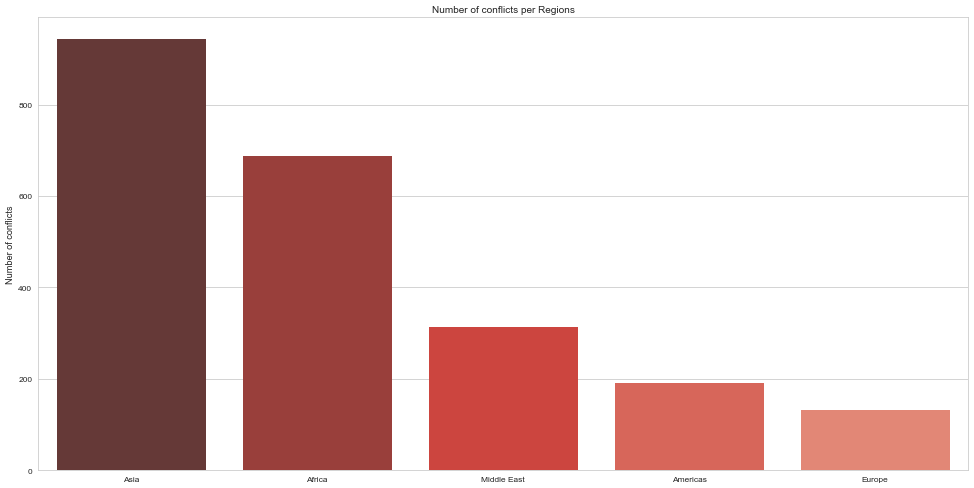

In [8]:
x = np.linspace(1,5,5)
y_ = ucdp_df['region'].value_counts().values
y = y_[:5]
myticks = ['Asia','Africa','Middle East','Americas','Europe']

plt.figure(figsize=(20,10), dpi=60, facecolor='w', edgecolor='k')
sns.set(style="whitegrid")
sns.barplot(x,y,palette="Reds_d")
plt.ylabel('Number of conflicts')
plt.title('Number of conflicts per Regions')
plt.xticks(x-1,myticks)
plt.show()

### What are they fighting for?

The dataset separates the main reason of the conflict. What are the protagonists fighting for? We can observe in the graph below that the main reason of conflicts happens for territorial claims. Then comes governemental conflicts. And finally, only a few of them combine those reason. (Separate this by continents now?)

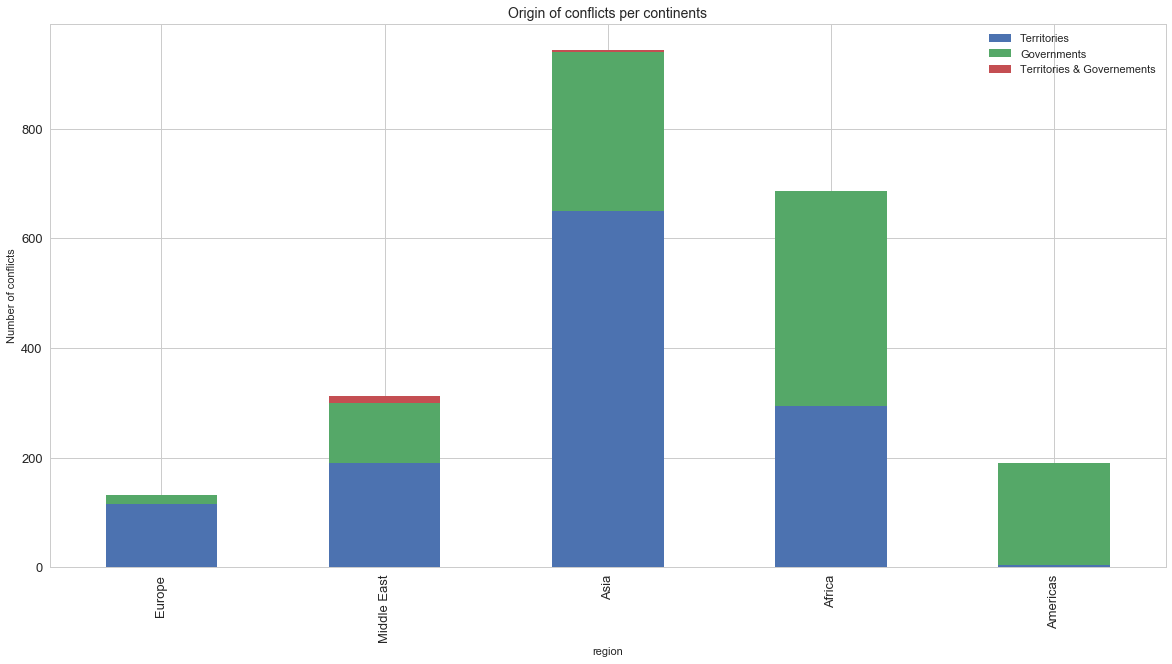

In [42]:
cleaned_df = ucdp_df.loc[~ucdp_df['region'].isin(['1, 3', '1, 2', '1, 4', '1, 5', '1, 3, 5', '1, 2, 3, 5'])]
myticks = ['Europe','Middle East','Asia','Africa','Americas']
df2 = cleaned_df.groupby(['region', 'incomp'])['region'].count().unstack('incomp').fillna(0)

plt.figure(figsize=(20,10), dpi=60, facecolor='w', edgecolor='k')
df2[[1,2,3]].plot(kind='bar', stacked=True, figsize = (20,10), fontsize = 13)
plt.xticks(np.linspace(1,5,5)-1, myticks)
plt.legend(['Territories', 'Governments', 'Territories & Governements'],fontsize = 11)
plt.title('Origin of conflicts per continents', fontsize = 14)
plt.ylabel('Number of conflicts')
plt.show()

In [ ]:
ucdp_df['region'].value_counts()

## Relevant countries examples

### Violently decolonized country - Algeria, Congo, Syria, Vietnam?

### Peacefully decolonized country - India, Lebanon, Philippines?